In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
stock = '^DJI'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000


In [43]:
price = data['Close']
price

Date
2010-01-04    10583.959961
2010-01-05    10572.019531
2010-01-06    10573.679688
2010-01-07    10606.860352
2010-01-08    10618.190430
                  ...     
2023-05-08    33618.691406
2023-05-09    33561.808594
2023-05-10    33531.328125
2023-05-11    33309.511719
2023-05-12    33300.621094
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

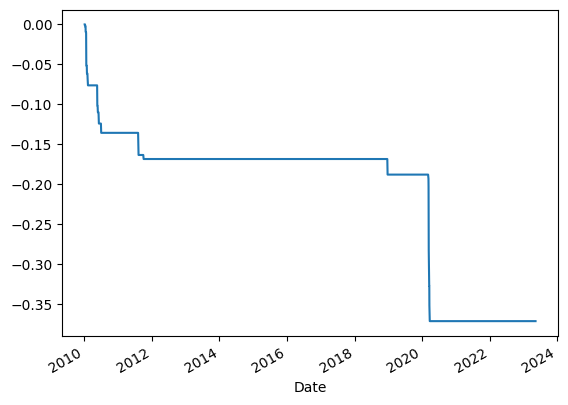

In [44]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [45]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -37.086171369594325 %


In [46]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns


array([ 0.        , -0.00112816,  0.00015703, ..., -0.00090819,
       -0.0066152 , -0.00026691])

In [47]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99887184, 0.99902869, ..., 3.16812689, 3.1471691 ,
       3.14632909])

In [48]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 314.6329088229129%


In [49]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.055284
2012-12-31    0.072566
2013-12-31    0.264994
2014-12-31    0.075191
2015-12-31   -0.022333
2016-12-31    0.134150
2017-12-31    0.250808
2018-12-31   -0.056303
2019-12-31    0.223384
2020-12-31    0.072465
2021-12-31    0.187275
2022-12-31   -0.087815
2023-12-31    0.004627
Freq: A-DEC, Name: Close, dtype: float64

In [50]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.025620
2010-03-31    0.051463
2010-04-30    0.013999
2010-05-31   -0.079209
                ...   
2023-01-31    0.028322
2023-02-28   -0.041933
2023-03-31    0.018907
2023-04-30    0.024764
2023-05-31   -0.023390
Freq: M, Name: Close, Length: 161, dtype: float64

In [51]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 9.033023238160895%


In [52]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 4.859065556807879


In [53]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.079209
2010-06-30   -0.035772
2010-08-31   -0.043113
2010-11-30   -0.010116
2011-05-31   -0.018793
2011-06-30   -0.012367
2011-07-31   -0.021838
2011-08-31   -0.043622
2011-09-30   -0.060287
2012-05-31   -0.062071
2012-10-31   -0.025353
2012-11-30   -0.005412
2013-06-30   -0.013626
2013-08-31   -0.044468
2014-01-31   -0.052955
2014-07-31   -0.015648
2014-09-30   -0.003249
2014-12-31   -0.000290
2015-01-31   -0.036925
2015-03-31   -0.019665
2015-06-30   -0.021719
2015-08-31   -0.065678
2015-09-30   -0.014722
2015-12-31   -0.016642
2016-01-31   -0.055020
2016-08-31   -0.001701
2016-09-30   -0.005039
2016-10-31   -0.009052
2017-03-31   -0.007160
2018-02-28   -0.042838
2018-03-31   -0.037000
2018-06-30   -0.005915
2018-10-31   -0.050742
2018-12-31   -0.086575
2019-05-31   -0.066855
2019-08-31   -0.017160
2020-01-31   -0.009896
2020-02-29   -0.100746
2020-03-31   -0.137438
2020-09-30   -0.022805
2020-10-31   -0.046077
2021-01-31   -0.020383
2021-06-30   -0.000780
2021-0

In [55]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 7.220013176361636
